In [ ]:
###STEP:1: SCRAPING OF REVIEWS FROM YOUTUBE USING SELENIUM AND CHROMEDRIVER

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from collections import OrderedDict
import time

# Step 1: Get inputs
video_url = input("Enter YouTube video URL: ")   #--------------------------Taking input of any youtube link from user
max_comments = int(input("Enter max number of comments to scrape: "))    #-----------------Since there are many comments user can set a limit to number of scrapes
chromedriver_path = "C:\\WebDriver\\chromedriver.exe"           # ------------------This path has been updated according to where Chromedriver is stored in my local disk


# Step 2: Setup Chrome
chrome_options = Options()                                         #----------------------This command allows us to visually see the simulation
# chrome_options.add_argument("--headless")                # Keep off for debugging   ------- Initially this command did not open the n=browser for us to see
chrome_options.add_argument("--disable-dev-shm-usage")         
chrome_options.add_argument("--no-sandbox")

service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)
wait = WebDriverWait(driver, 30)

# Step 3: Load video page
driver.get(video_url)

# Step 4: Wait for the comments section
try:
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "ytd-comments")))
    print("✅ Comments section detected.")                             # The code is tweaked to wait for comments to be seen and loaded and not move ahead if it 
except:                                                                # # has'nt popped up. No wait time restriction give here
    print("⚠️ Comments section not found.")
    driver.quit()

# Step 5: Start scrolling and collecting
youtube_reviews = []
collected_texts = set()
scroll_pause_time = 4

def scroll_page():
    driver.execute_script("window.scrollBy(0, 2000);")
    time.sleep(scroll_pause_time)

while len(youtube_reviews) < max_comments:
    scroll_page()
    
    # Find and clean comments
    comments = driver.find_elements(By.CSS_SELECTOR, "#content #content-text")
    for c in comments:
        comment_text = c.text.strip()
        if comment_text and comment_text not in collected_texts:
            youtube_reviews.append(comment_text)
            collected_texts.add(comment_text)

            if len(youtube_reviews) >= max_comments:
                break

    print(f"⏳ Scraped {len(youtube_reviews)} / {max_comments} comments...")

# Step 6: Clean up
driver.quit()
print(f"\n✅ Finished scraping {len(youtube_reviews)} comments!")


In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from collections import OrderedDict
import time

# Step 1: Get inputs
video_url = input("Enter YouTube video URL: ")   #--------------------------Taking input of any youtube link from user
max_comments = int(input("Enter max number of comments to scrape: "))    #-----------------Since there are many comments user can set a limit to number of scrapes
chromedriver_path = "C:\\WebDriver\\chromedriver.exe"           # ------------------This path has been updated according to where Chromedriver is stored in my local disk


# Step 2: Setup Chrome
chrome_options = Options()                                         #----------------------This command allows us to visually see the simulation
# chrome_options.add_argument("--headless")                # Keep off for debugging   ------- Initially this command did not open the n=browser for us to see
chrome_options.add_argument("--disable-dev-shm-usage")         
chrome_options.add_argument("--no-sandbox")

service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)
wait = WebDriverWait(driver, 30)

# Step 3: Load video page
driver.get(video_url)

# Step 4: Wait for the comments section to fully load
try:
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "ytd-comments")))
    print("✅ Comments section detected.")

    # Wait additionally for the actual comment elements to load
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "#content #content-text")))
    print("🟢 First comment block loaded.")
except:
    print("⚠️ Comments section not found or failed to load.")
    driver.quit()

# Step 5: Start scrolling and collecting
youtube_reviews = []
collected_texts = set()
scroll_pause_time = 4

def scroll_page():
    driver.execute_script("window.scrollBy(0, 2000);")
    time.sleep(scroll_pause_time)

no_growth_count = 0
last_count = 0
max_wait_cycles = 10  # avoid infinite loop if loading is too slow

while len(youtube_reviews) < max_comments and no_growth_count < max_wait_cycles:
    scroll_page()

    # Re-check that comment elements are loaded
    comments = driver.find_elements(By.CSS_SELECTOR, "#content #content-text")
    found_any_new = False

    for c in comments:
        comment_text = c.text.strip()
        if comment_text and comment_text not in collected_texts:
            youtube_reviews.append(comment_text)
            collected_texts.add(comment_text)
            found_any_new = True

        if len(youtube_reviews) >= max_comments:
            break

    print(f"⏳ Scraped {len(youtube_reviews)} / {max_comments} comments...")

    # Stop if no new comments appeared
    if len(youtube_reviews) == last_count:
        no_growth_count += 1
        print("⚠️ No new comments loaded, waiting again...")
    else:
        no_growth_count = 0  # reset growth counter

    last_count = len(youtube_reviews)

# Step 6: Clean up
driver.quit()
print(f"\n✅ Finished scraping {len(youtube_reviews)} comments!")

Enter YouTube video URL:  https://www.youtube.com/watch?v=zSWdZVtXT7E
Enter max number of comments to scrape:  100


✅ Comments section detected.
🟢 First comment block loaded.
⏳ Scraped 20 / 100 comments...
⏳ Scraped 20 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 20 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 20 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 20 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 40 / 100 comments...
⏳ Scraped 40 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 60 / 100 comments...
⏳ Scraped 60 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 80 / 100 comments...
⏳ Scraped 80 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 100 / 100 comments...

✅ Finished scraping 100 comments!


In [ ]:
#### STEP:2: WE WILL CHECK IF REVIEWS ARE SCRAPED  PROPERLY NOW

In [3]:
import pandas as pd

# Display scraped comments as a table
df_comments = pd.DataFrame(youtube_reviews[:max_comments], columns=["YouTube Comment"]) #----Put comments in a dataframe as a table and name it
df_comments.index += 1  # Start index from 1 instead of 0

# Show first 10 comments as a preview 
print("📝 Preview of scraped comments:")
display(df_comments.head(20))

# OR show the entire list (uncomment the next line if needed)
# display(df_comments) -----------------------------------------Excuting this would show all the reviews I choose to collect


📝 Preview of scraped comments:


,YouTube Comment
1,I will always regret so much not seeing this i...
2,The best movie I've ever seen in my life
3,"god, the background music should be the nation..."
4,Hans Zimmer + Christopher Nolan = perfection
5,I've never cried so hard watching a movie as I...
6,"The Prestige, Memento, Dark Knight, Inception,..."
7,How come they got no Oscar nominations or anyt...
8,"god what an experience this movie was, kinda r..."
9,The movie is 100 times better than this trailer
10,"From watching this, the Oscar nominations shou..."


In [ ]:
#### STEP:3: CLEANING AND PRE-PROCESSING THE SCRAPED COMMENTS

In [5]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')                                 #JOINING ALL COMMENTS INTO ONE LONG STRING

# Join all comments into one large string
ip_rev_string = " ".join(youtube_reviews)
ip_rev_string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'I will always regret so much not seeing this in a theater The best movie I\'ve ever seen in my life god, the background music should be the national space anthem. Hans Zimmer + Christopher Nolan = perfection I\'ve never cried so hard watching a movie as I cried watching this .. by far the best movie that I saw in the last 4 years.. 10/10 The Prestige, Memento, Dark Knight, Inception, etc..\nNolan has never let me down, can\'t wait for this film. How come they got no Oscar nominations or anything like that?! This movie was probably the best movie I\'ve ever seen! god what an experience this movie was, kinda regretting not seeing it in IMAX The movie is 100 times better than this trailer From watching this, the Oscar nominations should be for Best Actor for Matthew McConaughey, Best Actress for Anne Hathaway, Best Supporting Actress for Mackenzie Foy, Best Visual Effects, Best Production Design, Best Cinematography, Best Director for Christopher Nolan, Best Sound Mixing, Best Sound Edit

In [9]:
# Clean text
ip_rev_string = re.sub("[^A-Za-z]+", " ", ip_rev_string).lower()       #REMOVING SPL CHARACTERS ,DIGITS,SPACES AND MAKING LOWERCASE.ip_rev_string
                                                                     #Consists of string of words from Youtube comments without stopwords removed

In [11]:
ip_revi_words = ip_rev_string.split()                   
print(ip_revi_words[:50])                                         #SPLITTING THE STRING INTO SENSIBLE induvidual WORDS USING ".spilt" from NLTK

['i', 'will', 'always', 'regret', 'so', 'much', 'not', 'seeing', 'this', 'in', 'a', 'theater', 'the', 'best', 'movie', 'i', 've', 'ever', 'seen', 'in', 'my', 'life', 'god', 'the', 'background', 'music', 'should', 'be', 'the', 'national', 'space', 'anthem', 'hans', 'zimmer', 'christopher', 'nolan', 'perfection', 'i', 've', 'never', 'cried', 'so', 'hard', 'watching', 'a', 'movie', 'as', 'i', 'cried', 'watching']


In [19]:
# Load stopwords and extend slightly (generic, not product-specific)
stop_words = stopwords.words('english')
stop_words.extend(["youtube", "video", "product", "review", "subscribe","one", "channel","movie","trailer","imax","christopher","christopher nolan","nolan","murph","murphy","christian bale","hans zimmer","hans","zimmer","anne","anne hathaway","mathew","matthew","matthew mcconaughey","matt damon"])  #-------CAN ADD WORDS TO CUSTOM STOPWORDS 

# Remove stopwords
ip_reviews_words = [w for w in ip_revi_words if w not in stop_words and w != ""] #Conversion to a list of stopwords removed collection

# Preview
print("✅ Total cleaned words:", len(ip_reviews_words))
print("🧾 Sample cleaned words:", ip_reviews_words[:50]) #----------DISPLAYING A SAMPLE OF 50 CLEANED WORDS FROM THE REVIEW WORDS


✅ Total cleaned words: 1106
🧾 Sample cleaned words: ['always', 'regret', 'much', 'seeing', 'theater', 'best', 'ever', 'seen', 'life', 'god', 'background', 'music', 'national', 'space', 'anthem', 'perfection', 'never', 'cried', 'hard', 'watching', 'cried', 'watching', 'far', 'best', 'saw', 'last', 'years', 'prestige', 'memento', 'dark', 'knight', 'inception', 'etc', 'never', 'let', 'wait', 'film', 'come', 'got', 'oscar', 'nominations', 'anything', 'like', 'probably', 'best', 'ever', 'seen', 'god', 'experience', 'kinda']


In [ ]:
#### CREATING A WORD CLOUD WITH THE TOKENISED CLEANED WORDS FROM OUR SCRAPED REVIEWS

In [21]:
ip_rev_string = " ".join(ip_reviews_words)            # REJOINING CLEANED WORDS INTO A SINGLE STRING TO MAKE A WORD CLOUD
ip_rev_string                                         #Redefining "ip_rev_string" to have a string of all COMPLETELY CLEANED WORDS"(stopwords removed)

'always regret much seeing theater best ever seen life god background music national space anthem perfection never cried hard watching cried watching far best saw last years prestige memento dark knight inception etc never let wait film come got oscar nominations anything like probably best ever seen god experience kinda regretting seeing times better watching oscar nominations best actor mcconaughey best actress hathaway best supporting actress mackenzie foy best visual effects best production design best cinematography best director best sound mixing best sound editing best picture cried like avoids using cgi whenever possible even lighting isnt bright flashy gives realistic experience story telling lot hollywood films could learn kind idea cant wait see theatres fav til watched feels real going powerful rock foundation science fiction movies many many years mark word watched best life cried watch love treats audience intelligence feel need spell everything dumb creating thought prov

In [ ]:
#NOTE:

## THE FIRST CLEANING REMOVED ALL DIGITS,SPACES,SPL CHAR,MADE LOWERCASE AND WAS STILL A DOCUMENT WITH ONE LONG STRING
## THEN I SPLIT IT INTO WORDS--------LEADING TO "ip_revi_words"(contains stop words)
## THEN I DEFINED STOPWORDS AND REMOVED THEM TO FURTHER CLEAN IT-------LEADING TO "ip_reviews_words"(does not contain stopwords)

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


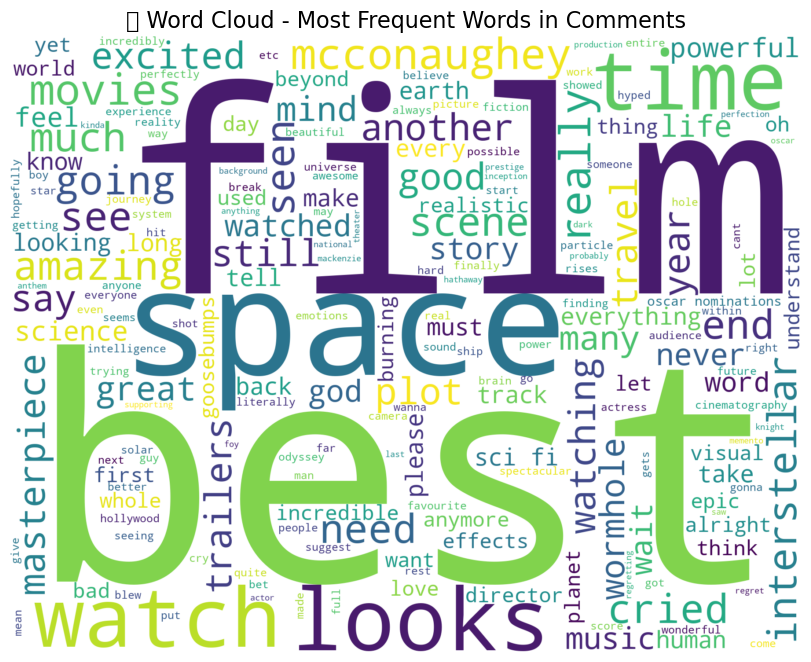

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(
    background_color='white',
    width=1800,                                   # WORDCLOUD GENERATION FOR CLEANED WORDS IN MY COMMENTS
    height=1400
).generate(ip_rev_string)                         #The ".generate" function demands a single document of words(string) seperated by " ".

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🌀 Word Cloud - Most Frequent Words in Comments", fontsize=16)
plt.show()


In [ ]:
#### USING 'TEXTBLOB' LIBRARY FOR SENTIMENT CLASSIFICATION OF CLEANED WORDS TO POSSITIVE AND NEGATIVE

In [25]:
!pip install textblob

In [27]:
from textblob import download_corpora
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

Finished.


In [29]:
from textblob import TextBlob

def analyze_sentiments_in_string(text):              #--------Defining a function to judge sentiment of words(+,- or neutral) using textblob
    # Tokenize words using TextBlob
    words = TextBlob(text).words

    # Analyze polarity of each word
    sentiments = {word: TextBlob(word).sentiment.polarity for word in words}

    # Split into positive and negative
    positive_words = {word: sentiment for word, sentiment in sentiments.items() if sentiment > 0} # Classifying words with >0 score in here as +ive
    negative_words = {word: sentiment for word, sentiment in sentiments.items() if sentiment < 0} # Classifying words with <0 score in here as -ive

    return positive_words, negative_words

# Run it on your cleaned string
positive_words, negative_words = analyze_sentiments_in_string(ip_rev_string)  # Calling the function to act on our "Cleaned Words" which have a sentiment
                                                                              # score possibly attached to them
# Show results
print(f"✅ Found {len(positive_words)} positive words")
print(f"✅ Found {len(negative_words)} negative words")

# Preview few words
print("\nPositive Sample:", list(positive_words.items())[:10])
print("Negative Sample:", list(negative_words.items())[:10])


✅ Found 68 positive words
✅ Found 23 negative words

Positive Sample: [('much', 0.2), ('best', 1.0), ('far', 0.1), ('better', 0.5), ('supporting', 0.25), ('sound', 0.4), ('bright', 0.7000000000000001), ('realistic', 0.16666666666666666), ('kind', 0.6), ('real', 0.2)]
Negative Sample: [('hard', -0.2916666666666667), ('dark', -0.15), ('flashy', -0.5), ('dumb', -0.375), ('long', -0.05), ('complex', -0.3), ('wan', -0.2), ('hate', -0.8), ('hardly', -0.2916666666666667), ('seriously', -0.3333333333333333)]


In [ ]:
#### POSITIVE AND NEGATIVE WORDS WORD-CLOUD-------PURELY BASED ON WORDS WHICH ALIGN WITH DICTIONARY AND NOT CONTEXT

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


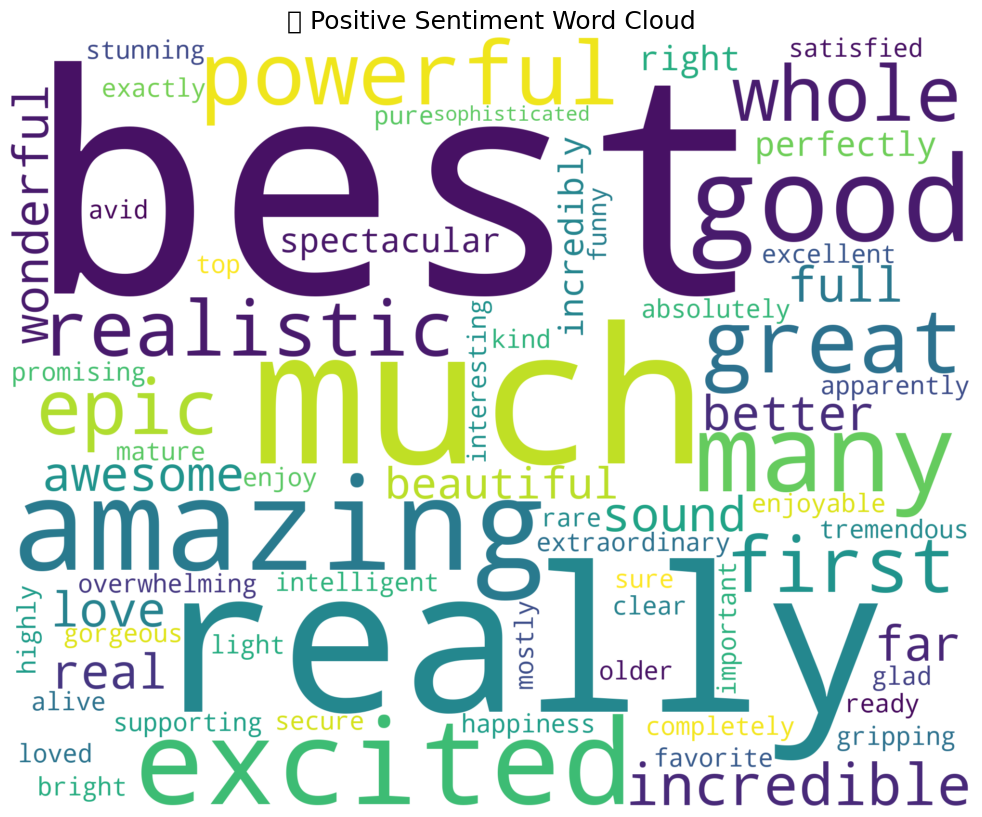

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


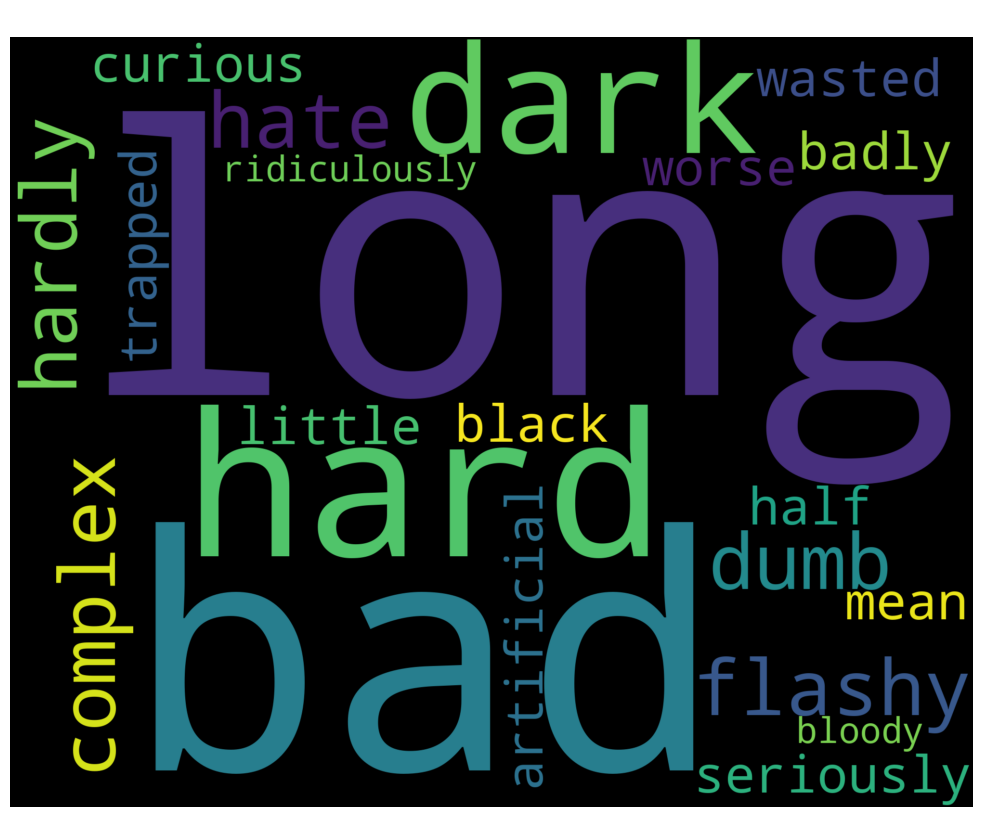

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Extract positive and negative words from cleaned list
ip_pos_in_pos = " ".join([w for w in ip_reviews_words if w in positive_words])
ip_neg_in_neg = " ".join([w for w in ip_reviews_words if w in negative_words])

# Step 2: Generate Positive Word Cloud
wordcloud_pos = WordCloud(
    background_color='white',
    width=2000,
    height=1600,
    max_words=500
).generate(ip_pos_in_pos)

# Step 3: Display Positive Word Cloud
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("💚 Positive Sentiment Word Cloud", fontsize=18)
plt.show()

# Step 4: Generate Negative Word Cloud
wordcloud_neg = WordCloud(
    background_color='black',
    width=2000,
    height=1600,
    max_words=500
).generate(ip_neg_in_neg)

# Step 5: Display Negative Word Cloud
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("💔 Negative Sentiment Word Cloud", fontsize=18, color='white')
plt.show()


In [ ]:
#### CREATION OF BI-GRAMS WITH CLEANED WORDS IN REVIEWS BUT STOPWORDS STILL KEPT

In [33]:
from nltk.util import ngrams

# Step 1: Remove empty or whitespace-only tokens
tokens_with_stopwords = [word for word in ip_revi_words if word.strip() != ""]

# Step 2: Generate bi-grams
bigrams_list = list(ngrams(tokens_with_stopwords, 2))

# Step 3: Convert tuple bi-grams to strings
bigram_phrases = [' '.join(pair) for pair in bigrams_list]

# Step 4: Display results
print(f"✅ Total bi-grams generated: {len(bigram_phrases)}")
print("\n📋 Sample bi-grams:")
for i, bigram in enumerate(bigram_phrases[:50]):
    print(f"{i+1}. {bigram}")



✅ Total bi-grams generated: 2385

📋 Sample bi-grams:
1. i will
2. will always
3. always regret
4. regret so
5. so much
6. much not
7. not seeing
8. seeing this
9. this in
10. in a
11. a theater
12. theater the
13. the best
14. best movie
15. movie i
16. i ve
17. ve ever
18. ever seen
19. seen in
20. in my
21. my life
22. life god
23. god the
24. the background
25. background music
26. music should
27. should be
28. be the
29. the national
30. national space
31. space anthem
32. anthem hans
33. hans zimmer
34. zimmer christopher
35. christopher nolan
36. nolan perfection
37. perfection i
38. i ve
39. ve never
40. never cried
41. cried so
42. so hard
43. hard watching
44. watching a
45. a movie
46. movie as
47. as i
48. i cried
49. cried watching
50. watching this


In [ ]:
#### BI-GRAMS WORD CLOUD TO SEE MOST REPEATING PHRASES------I ALREADY HAVE THE PHRASES---NEED TO JUST PROCESS THEM
#### HENCE I AM USING "COUNTER" INSTEAD OF COUNT VECTORISER"

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


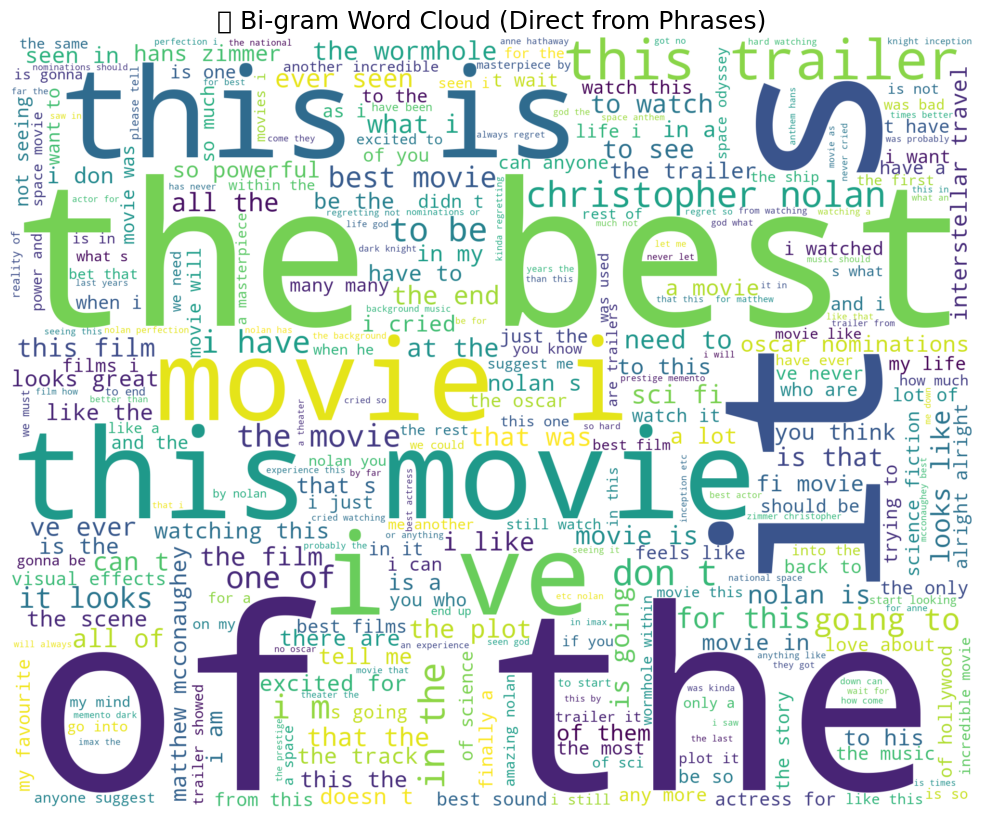

In [35]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Count bi-gram frequencies
bigram_counts = Counter(bigram_phrases)

# Step 2: Generate WordCloud from the Counter
bigram_wordcloud = WordCloud(
    width=2000,
    height=1600,
    background_color='white',
    max_words=300
).generate_from_frequencies(bigram_counts)

# Step 3: Display
plt.figure(figsize=(14, 10))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🔗 Bi-gram Word Cloud (Direct from Phrases)", fontsize=18)
plt.show()



In [ ]:
###LIST OF BI-GRAMS WHEN STOPWORDS ARE REMOVED

In [37]:
# Step 1: Remove empty or whitespace-only tokens
tokens_with_stopwords1 = [word for word in ip_reviews_words if word.strip() != ""]

# Step 2: Generate bi-grams
bigrams_list1 = list(ngrams(tokens_with_stopwords1, 2))

# Step 3: Convert tuple bi-grams to strings
bigram_phrases1 = [' '.join(pair) for pair in bigrams_list1]

# Step 4: Display results
print(f"✅ Total bi-grams generated: {len(bigram_phrases1)}")
print("\n📋 Sample bi-grams:")
for i, bigram2 in enumerate(bigram_phrases1[:50]):
    print(f"{i+1}. {bigram2}")


✅ Total bi-grams generated: 1105

📋 Sample bi-grams:
1. always regret
2. regret much
3. much seeing
4. seeing theater
5. theater best
6. best ever
7. ever seen
8. seen life
9. life god
10. god background
11. background music
12. music national
13. national space
14. space anthem
15. anthem perfection
16. perfection never
17. never cried
18. cried hard
19. hard watching
20. watching cried
21. cried watching
22. watching far
23. far best
24. best saw
25. saw last
26. last years
27. years prestige
28. prestige memento
29. memento dark
30. dark knight
31. knight inception
32. inception etc
33. etc never
34. never let
35. let wait
36. wait film
37. film come
38. come got
39. got oscar
40. oscar nominations
41. nominations anything
42. anything like
43. like probably
44. probably best
45. best ever
46. ever seen
47. seen god
48. god experience
49. experience kinda
50. kinda regretting


C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


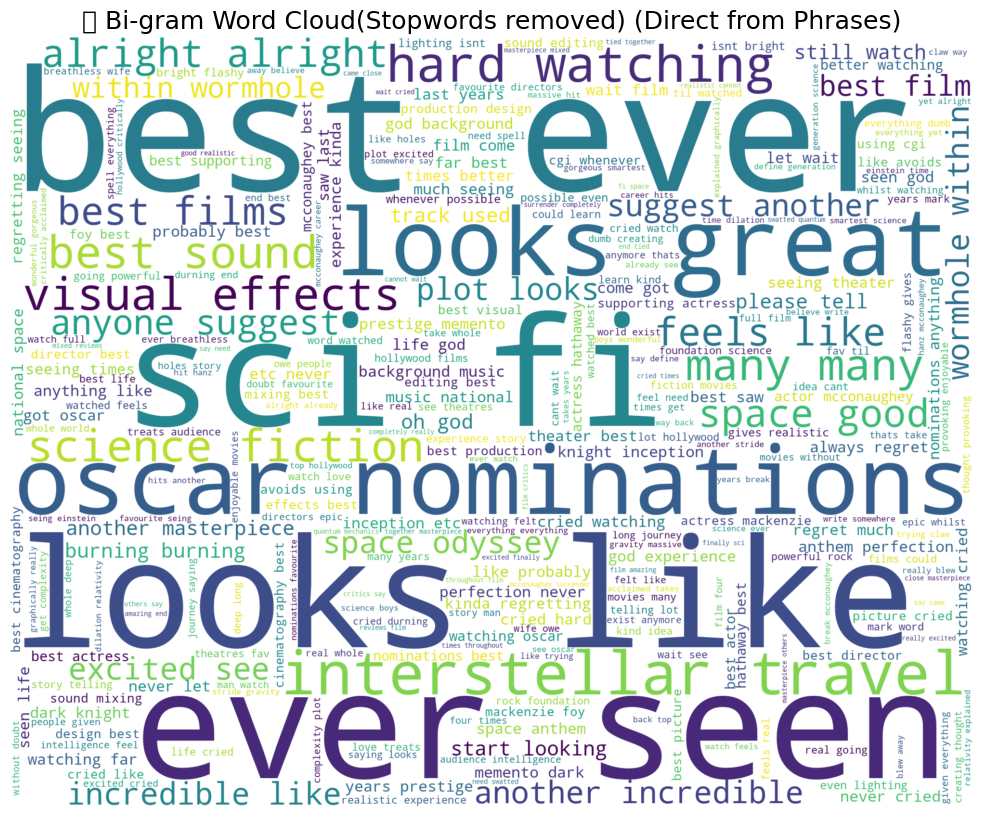

In [39]:
### WORDCLOUD OF BI-GRAMS WHEN STOPWORDS ARE REMOVED

# Step 1: Count bi-gram frequencies
bigram_counts1 = Counter(bigram_phrases1)

# Step 2: Generate WordCloud from the Counter
bigram_wordcloud1 = WordCloud(
    width=2000,
    height=1600,
    background_color='white',
    max_words=300
).generate_from_frequencies(bigram_counts1)

# Step 3: Display
plt.figure(figsize=(14, 10))
plt.imshow(bigram_wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title("🔗 Bi-gram Word Cloud(Stopwords removed) (Direct from Phrases)", fontsize=18)
plt.show()


In [ ]:
#####
#####
#####      SENTIMENT SUMMARY AND EMOTION DISTRIBUTION USING "NRC EMOTION LEXICON"
#####
#####

In [41]:
import pandas as pd

# Define the path to the downloaded lexicon file
nrc_lexicon_path = 'D:/Rishi/JINDAL Academics/Term 5 Subjects/Social Media Analytics/Final Project/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

# Load the lexicon into a DataFrame
nrc_df = pd.read_csv(nrc_lexicon_path, sep='\t', header=None, names=['word', 'emotion', 'association'])

# Filter out rows where association is 0
nrc_df = nrc_df[nrc_df['association'] == 1]

# Pivot the DataFrame to have words as index and emotions as columns
nrc_pivot = nrc_df.pivot(index='word', columns='emotion', values='association').fillna(0)

# Display the first few rows of the pivoted DataFrame
print(nrc_pivot.head())


emotion      anger  anticipation  disgust  fear  joy  negative  positive  \
word                                                                       
abacus         0.0           0.0      0.0   0.0  0.0       0.0       0.0   
abandon        0.0           0.0      0.0   1.0  0.0       1.0       0.0   
abandoned      1.0           0.0      0.0   1.0  0.0       1.0       0.0   
abandonment    1.0           0.0      0.0   1.0  0.0       1.0       0.0   
abba           0.0           0.0      0.0   0.0  0.0       0.0       1.0   

emotion      sadness  surprise  trust  
word                                   
abacus           0.0       0.0    1.0  
abandon          1.0       0.0    0.0  
abandoned        1.0       0.0    0.0  
abandonment      1.0       1.0    0.0  
abba             0.0       0.0    0.0  


In [ ]:
ip_reviews_words  # These are the words cleaned completelely(Even stopwords removed)

In [ ]:
### WE will now try to associate these words from Youtube comments with NRC Emotion Lexicon

In [43]:
from collections import Counter

def analyze_emotions(comments, nrc_pivot):
    # Initialize a counter for emotions
    emotion_counter = Counter()

    # Iterate over each word in the comments
    for word in comments:
        if word in nrc_pivot.index:
            # Add the emotions associated with the word
            emotion_counter.update(nrc_pivot.loc[word][nrc_pivot.loc[word] > 0].index)

    return emotion_counter

# Assuming 'ip_reviews_words' is your list of cleaned words from YouTube comments
emotion_counts = analyze_emotions(ip_reviews_words, nrc_pivot)

# Display the emotion counts
print(emotion_counts)

Counter({'positive': 110, 'anticipation': 81, 'joy': 64, 'trust': 58, 'negative': 45, 'fear': 42, 'sadness': 30, 'anger': 29, 'surprise': 26, 'disgust': 20})


In [ ]:
##Above output denotes number of words in our corpus which are associated with "Emotions"-----We get overall emotion distribution
## in our corpus

# Visualize the Emotion Distribution

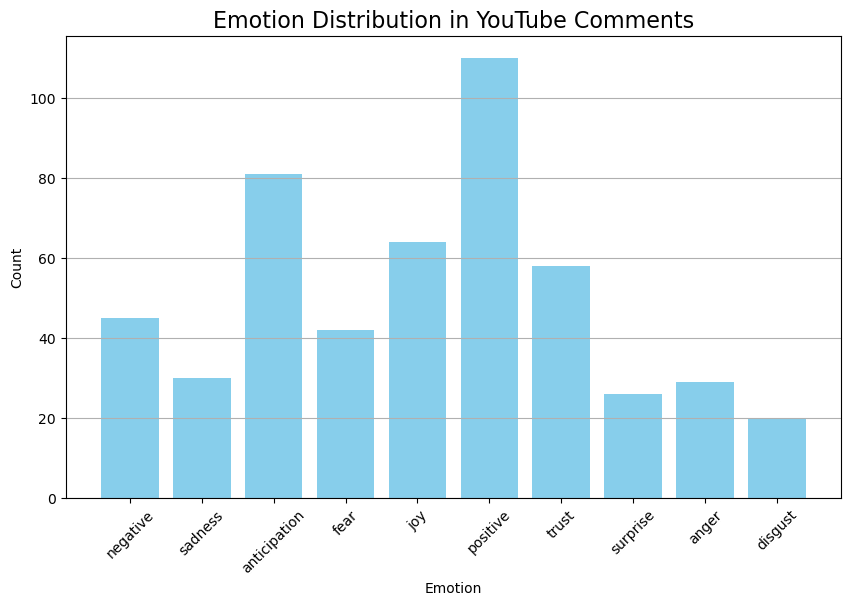

In [45]:
# Plot the emotion distribution
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.title("Emotion Distribution in YouTube Comments", fontsize=16)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
### Performing Different Activities like Senti Analysis(as a whole), Topic Modelling, Text Summarisation, Keyword extraction
### Named Entity Recognition

In [47]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy


In [49]:

def analyze_sentiment(text):
    return TextBlob(text).sentiment

def topic_modeling(docs, num_topics=5):
    vectorizer = CountVectorizer(stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(docs)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
    lda.fit(doc_term_matrix)
    return lda, vectorizer.get_feature_names_out()

def extract_keywords(docs, num_keywords=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(docs)
    feature_array = vectorizer.get_feature_names_out()
    
    # Compute average TF-IDF score across all documents
    tfidf_scores = tfidf_matrix.mean(axis=0).A1  # .A1 flattens the sparse matrix
    sorted_indices = tfidf_scores.argsort()[::-1]
    
    # Get top N keywords
    top_keywords = feature_array[sorted_indices][:num_keywords]
    return top_keywords

def named_entity_recognition(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)


In [51]:
##Topic Modelling

# Run topic modeling on the raw comment list
lda_model, feature_names = topic_modeling(youtube_reviews, num_topics=5)

# Display the top 10 words per topic
print("🧠 Topics discovered:")
for idx, topic in enumerate(lda_model.components_):
    print(f"\n🔹 Topic {idx+1}:")
    top_words_indices = topic.argsort()[:-11:-1]  # Top 10 words
    top_words = [feature_names[i] for i in top_words_indices]
    print(", ".join(top_words))


🧠 Topics discovered:

🔹 Topic 1:
movie, like, just, movies, nolan, science, really, mind, seen, great

🔹 Topic 2:
best, movie, like, end, film, nolan, cried, going, 10, watching

🔹 Topic 3:
nolan, movie, don, like, travel, christopher, amazing, need, time, mcconaughey

🔹 Topic 4:
movie, watch, film, track, trailer, used, best, masterpiece, excited, sci

🔹 Topic 5:
nolan, good, space, imax, zimmer, film, movie, god, looks, really


In [ ]:
###TD-IDF---TF-IDF stands for Term Frequency–Inverse Document Frequency.
### It helps you find: 1) Important words in a document , 2) Based on how frequently they appear in one doc, 3)And how rare they are across all docs

In [53]:
# Extract top N keywords from all YouTube comments
top_keywords = extract_keywords(youtube_reviews, num_keywords=10)

# Display result
print("🔑 Top Keywords (TF-IDF Based):")
for i, kw in enumerate(top_keywords, 1):
    print(f"{i}. {kw}")


🔑 Top Keywords (TF-IDF Based):
1. nolan
2. movie
3. best
4. trailer
5. like
6. film
7. christopher
8. cried
9. ve
10. amazing


In [ ]:
### Named Entity Recognition:(NER)-------
#It extracts real-world objects from text---Helps Identify Real life Person, Organisation and Products being discussed in comments.

In [55]:
youtube_reviews_string = " ".join(youtube_reviews)

In [57]:
nlp = spacy.load("en_core_web_sm")  # Load spaCy's small English model

In [59]:
# Run Named Entity Recognition
entities = named_entity_recognition(youtube_reviews_string)

# Display all recognized entities grouped by type
from collections import defaultdict
entity_dict = defaultdict(list)

for text, label in entities:
    entity_dict[label].append(text)

# Print sample results
print("🧠 Named Entities Found:\n")
for label, values in entity_dict.items():
    print(f"{label} ({len(values)}):")
    print(", ".join(set(values[:10])))  # show up to 10 unique entities
    print("-----")


🧠 Named Entities Found:

PERSON (35):
Anne Hathaway, Mark, Christopher Nolan, Prestige, Oscar, Matthew McConaughey, Hans Zimmer, Dark Knight
-----
DATE (18):
the last 4 years, November, every couple days, many many years, May 2015, the year, years, 2001, 0:19
-----
GPE (7):
Wormholes, Fountain, Memento, Sunshine, Mcconaughey, Hollywood
-----
ORG (27):
sci-fi, Nolan, Best Visual Effects, Gravity, CGI, Best Supporting Actress for Mackenzie Foy, Science Fiction, Universe, Best Actress
-----
CARDINAL (11):
one, 100, 4, 2min, four, 38e, One
-----
WORK_OF_ART (3):
Lost In Space the Good Version, The World Doesn't Need Anymore Engineers, Best Actor
-----
TIME (5):
2:17, the first hour, 1:28, 1:54, 1:40
-----
ORDINAL (2):
first, second
-----
NORP (1):
German
-----
LOC (2):
earth, Earth
-----
PRODUCT (1):
Saludos
-----


In [ ]:
### I Dont find the results of NER to be very ideal and sensible